In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import imdb

In [3]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words= 10000)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [15]:
np.unique(y_train)

array([0, 1])

In [4]:
x_train.shape, x_test.shape, y_train.shape

((25000,), (25000,), (25000,))

In [6]:
x_train

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

In [7]:
max([len(x) for x in x_train])

2494

In [9]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [10]:
# pad the sequence to have the equal length
# can specify but may lose info or take max len but will increase compute

# max_len = max([len(x) for x in x_train])
max_len = 500
x_train = pad_sequences(x_train, maxlen= max_len)
x_test = pad_sequences(x_test, maxlen = max_len)

In [12]:
max([len(x) for x in x_train])

500

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Bidirectional, Embedding, SimpleRNN

In [13]:
# set the input and output dimension
input_dim = 10000   # vocabulary size -> considering top 10000 frequent words from the data
# each of the word will get an interger id
output_dim = 1

In [16]:
# Build the model

model = Sequential()

In [17]:
# embedding layer
model.add(Embedding(input_dim, 128, input_length = max_len))

# bi directional
model.add(Bidirectional(SimpleRNN(150, return_sequences=True)))
model.add(Bidirectional(SimpleRNN(150)))

model.add(Dense(output_dim, activation= 'sigmoid'))

In [18]:
model.compile(optimizer= 'adam', loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [25]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (32, 500, 128)         │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (32, 500, 300)         │        83,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (32, 300)              │       135,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (32, 1)                │           301 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,497,905 (17.16 MB)

 Trainable params: 1,499,301 (5.72 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,998,604 (11.44 MB)

In [20]:
# early stopping if necessary

from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor = 'val_loss',
                               patience = 10,
                               restore_best_weights = True)

In [22]:
# train the model

history = model.fit(x_train, y_train,
                    callbacks= [early_stopping],
                    epochs = 15, batch_size = 32,
                    validation_split = 0.2, verbose = 1)

Epoch 1/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 100s 159ms/step - accuracy: 0.7325 - loss: 0.5381 - val_accuracy: 0.6520 - val_loss: 0.6160
Epoch 2/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 99s 158ms/step - accuracy: 0.7798 - loss: 0.4709 - val_accuracy: 0.7816 - val_loss: 0.4938
Epoch 3/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 99s 158ms/step - accuracy: 0.8350 - loss: 0.3887 - val_accuracy: 0.7594 - val_loss: 0.5451
Epoch 4/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 99s 158ms/step - accuracy: 0.8494 - loss: 0.3498 - val_accuracy: 0.7556 - val_loss: 0.5527
Epoch 5/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 99s 158ms/step - accuracy: 0.8839 - loss: 0.2927 - val_accuracy: 0.7686 - val_loss: 0.5559
Epoch 6/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 99s 159ms/step - accuracy: 0.8801 - loss: 0.3036 - val_accuracy: 0.7684 - val_loss: 0.5924
Epoch 7/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 99s 158ms/step - accuracy: 0.9040 - loss: 0.2544 - val_accuracy: 0.8034 - val_loss: 0.6134
Epoch 8/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 99s 158ms/step - accuracy: 0.9109 - loss: 

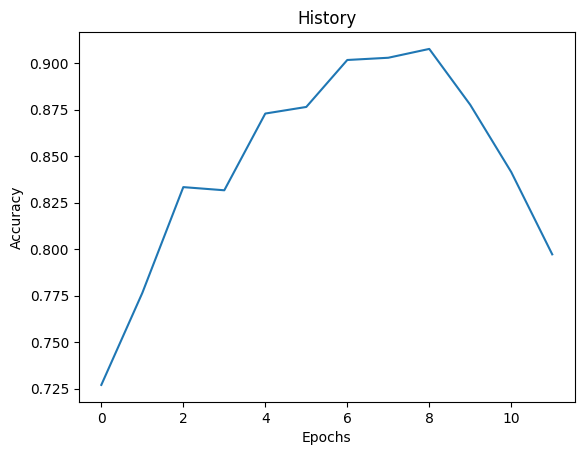

In [23]:
# Plot the accuracy
fig = plt.plot(history.history['accuracy'])
title = plt.title("History")
xlabel = plt.xlabel("Epochs")
ylabel = plt.ylabel("Accuracy")


In [24]:
x_test[:4]

array([[   0,    0,    0, ...,   14,    6,  717],
       [   0,    0,    0, ...,  125,    4, 3077],
       [  33,    6,   58, ...,    9,   57,  975],
       [   0,    0,    0, ...,   28,  314, 1772]], dtype=int32)

In [ ]:
# predict
predictions = model.predict(x_test[:4])
for pred in predictions:
    print(np.argmax(pred[0]), end = ' ')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
0 0 0 0 

In [ ]:
# save the model

model.save('BiDirection_GRU_rnn_imdb.h5')